# 1.2.4 Spatial and temporal completeness of methane satellite observations for the analysis of extreme events related to large episodic release

Production date: 26-03-2025

Produced by: CNR

## 🌍 Use case: Detecting extreme release of methane into the atmosphere

## ❓ Quality assessment question
* **Are methane satellite observations suitable for detecting atmospheric signals associated with extreme emission releases?**
* **How well, in terms of completeness, do Level 2 mid-tropospheric CH4 columns capture the spatial variability of methane associated with large release events?**

Methane (CH4) is the second most important anthropogenic greenhouse gas after carbon dioxide (CO2), representing about 19% of the total radiative forcing by long-lived greenhouse gases [[1]](https://wmo.int/publication-series/wmo-greenhouse-gas-bulletin-no-19). Atmospheric CH4 also adversely affects human health as a precursor of tropospheric ozone [[2]](https://doi.org/10.1073/pnas.0600201103). Thus, sudden large release of CH4 into the atmosphere could have significant consequences in terms of climate change and health. 

On 26 September 2022, multiple gas leaks were detected from the Nord Stream, an offshore submerged pipeline system that carries natural gas from Russian facilities into Western Europe ([[3]](https://doi.org/10.5194/acp-24-10639-2024), [[4]](https://www.unep.org/news-and-stories/story/pipeline-blasts-released-record-shattering-amount-methane-unep-study)).   

In this application, the Level-2 mid-tropospheric CH4 columns from the IASI instruments (dataset version 10.2) is evaluated. A Level 2 dataset corresponds to data from a specific combination of satellite sensor and retrivial algorithm for each individual satellite footprint along the orbit tracks (see [[5]](https://wdc.dlr.de/C3S_312b_Lot2/Documentation/GHG/C3S2_312a_Lot2_PUGS_GHG_main_latest.pdf)). 

Although the CH4 satellite observations provided by the Climate Data Store are not specifically designed to identify sudden large release events, this application explores the possibility that mid-tropospheric satellite IASI CH4 (v10.2) data can be used to identify the atmospheric signal of emissions as those associated with the Nord Stream event.

## 📢 Quality assessment statement

```{admonition} These are the key outcomes of this assessment
:class: note
* The IASI CH4 (v10.2) mid-tropospheric product was able to detect the atmospheric signal of massive CH4 release related with the Nord Stream leak on September 2022.
* In terms of completeness, the ability of IASI CH4 (v10.2) mid-tropospheric product to detect the atmospheric signal of the CH4 plume was limited by the cloud coverage and by the vertical sensitivity of the measurements.
* Users need to ta aware about the strict cloud screening adopted by the should consult the documentation as well as the uncertainty and quality flags in the data files as appropriate for their applications. 
* Users need to be aware about the vertical senstivity of the product. They should consult the Documentation (e.g., [[7]](https://wdc.dlr.de/C3S_312b_Lot2/Documentation/GHG/C3S2_312a_Lot2_PUGS_GHG_E_latest.pdf)) for guidance on how to use the averaging kernels.
* The use of this data product to investigate CH4 fluxes occurring at the Earth's surface is recommended in conjunction with appropriate (inversion) modelling.
* Since this dataset is updated on a yearly basis, users interested in near real time applications should consider other Copernicus resources (e.g., [[11]](https://atmosphere.copernicus.eu/ghg-services/cams-methane-hotspot-explorer?utm_source=press&utm_medium=referral&utm_campaign=CH4-app-2025)).
```

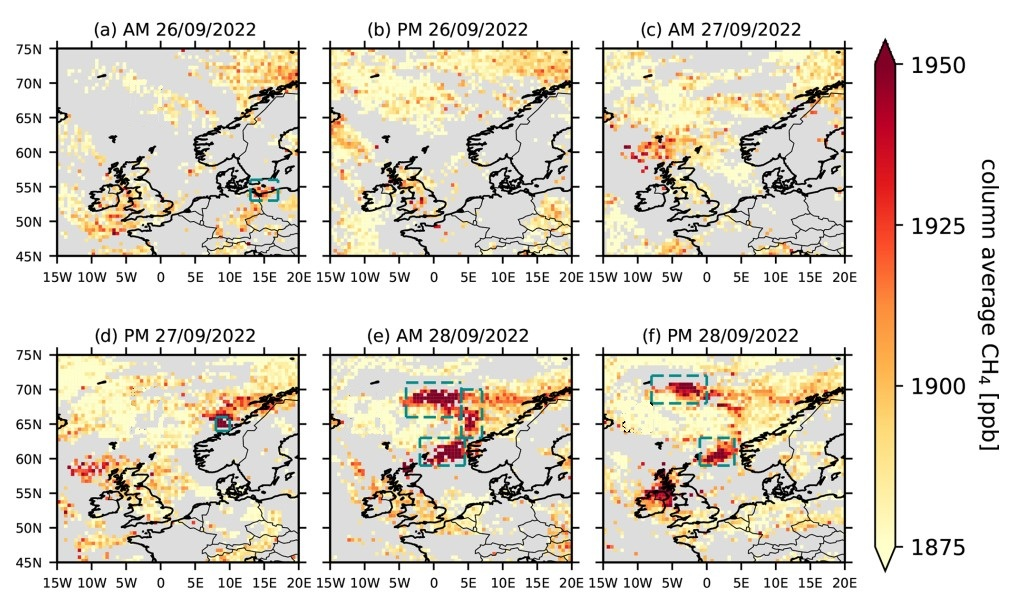

*Fig. 1.2.4.1 The figure shows mid-tropospheric IASI column average CH4 (ppb) for 26–28 September 2022 as provided by [[3]](https://doi.org/10.5194/acp-24-10639-2024) under CC-BY license. Turquoise boxes show regions characterised by the presence of the methane plume. AM (PM) indicate the morning (evening) satellite overpasses of each day*

## 📋 Methodology

This notebook has three main objectives:
* To compare the spatial fields of mid-tropospheric column-averaged methane (CH4) mixing ratios from IASI sensors with independent analyses [[3]](https://doi.org/10.5194/acp-24-10639-2024) over the geographical region and time frame (26-28 September 2022) affected by the Nord Stream emissions.
* To attribute the observed differences as a function of the cloud cover over the observation scene and the adopted averaging kernels (describing the vertical sensitivity of the retrieved products).
* To guide the user in the correct use of the evaluated data sets. 

The analysis methodology is divided into the following steps:

**[](section-1)**
 * Define the libraries to be used.
 * Define notebook setup parameters and data requests.
 * Define the functions used in the analysis.

**[](section-2)**
 * Download mid-tropospheric CH4 and cloud cover data for the time period and spatial region of interest.

**[](section-3)**
 * Plotting of mid-tropospheric CH4 maps
 * Plotting of cloud cover maps
 * Plotting of averaging kernels
 * Plotting of time series of daily mid-tropospheric CH4 distribution over the region of interest.

Note that prior to the analyses, the original Level 2 mid-tropospheric CH4 data were regridded to a regular 1° x 1° grid and the cloud cover data were retrieved from the Climate Data Store dataset [[6]](https://cds.climate.copernicus.eu/datasets/satellite-cloud-properties?tab=overview) "Cloud properties global gridded monthly and daily data from 1979 to present derived from satellite observations".

## 📈 Analysis and results

(section-1)=
### 1. Choose the data to use and setup the code

#### Define libraries to be used
In this step, libraries needed to run the code are imported.

In [9]:
import os
os.environ["CDSAPI_RC"] = os.path.expanduser("~/cristofanelli_paolo/.cdsapirc")

import flox.xarray
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from c3s_eqc_automatic_quality_control import diagnostics, download, plot, utils

plt.style.use("seaborn-v0_8-notebook")

download.INVALIDATE_CACHE = True

#### Define notebook setting parameters and data request
In this step, we define:
* the list of sensors to be used for getting methane data.
* the region of intereset.
* the variables to be retrieved by the datasets.
* the time frame of data to be analysed.
* the range of legend variability to plot CH4 values in the spatial map.
* the list of CDS datasets to be downloaded.

In [10]:
# Sensors
sensors = ["iasi_metop_b_nlis", "iasi_metop_c_nlis"]

# Region to plot
lat_slice = slice(45, 75)
lon_slice = slice(-15, 20)

# Focus region to plot
lat_slice_boxplot = slice(60, 70)
lon_slice_boxplot = slice(0, 5)

# Variable to plot
varname = "ch4"
vertical_profile = "ch4_averaging_kernel"
varname_cloud = "cfc"

# List of days to be considered (format 'YYYY-MM-DD')
selected_days = ["2022-09-26","2022-09-27","2022-09-28"]
selected_days_AK = ["2022-09-28"]

# To define the range of map legend
vmin = 1875  # Valore minimo
vmax = 1950  # Valore massimo

In [11]:
time_request = {
    "year": ["2022"],
    "month": ["09"],
    "day": [f"{day:02d}" for day in range(1, 31)],
}

collection_id = "satellite-methane"
request = time_request | {
    "processing_level": ["level_2"],
    "variable": "ch4",
    "version": ["10_2"],
}

collection_id_cloud = "satellite-cloud-properties"
request_cloud = time_request | {
    "product_family": "clara_a3",
    "origin": "eumetsat",
    "variable": ["cloud_fraction"],
    "climate_data_record_type": "interim_climate_data_record",
    "time_aggregation": "daily_mean",
}

#### Define functions used in the analysis
In this step we define the functions to be used in the analysis:
* Function to regrid the data to a regular spatial grid.
* Function to extract mean kernel values and associated pressure levels from the mid-tropospheric IASI CH4 (v10.2) dataset and perform spatial aggregation. 

In [12]:
def arithmetic_unweighted_average(ds, d_lon, d_lat, lon1):
    if lon1 not in (180, 360):
        raise ValueError(f"lon1 must be 180 or 360. {lon1=}")
    lon0 = -180 if lon1 == 180 else 0

    coords = {}
    expected_groups = ()
    for name, start, stop, step in zip(
        ["latitude", "longitude"], [-90, lon0], [90, lon1], [d_lat, d_lon]
    ):
        coords[name] = np.arange(start + step / 2, stop + step / 2, step)
        groups = np.arange(start, stop + step, step)
        groups[0] -= step
        expected_groups += (pd.IntervalIndex.from_breaks(groups),)

    ds = flox.xarray.xarray_reduce(
        ds, *coords, func="mean", expected_groups=expected_groups, keep_attrs=True
    )
    ds = ds.rename({f"{coord}_bins": coord for coord in coords}).assign_coords(coords)
    for coord in ds.coords:
        ds[coord].attrs["standard_name"] = coord
    return ds


def regionalised_daily_regrid(ds, d_lon, d_lat, lon_slice, lat_slice, lon1=180):
    for dim, var in zip(
        ["level_dim", "layer_dim"], ["pressure_levels", "pressure_weight"]
    ):
        assert (ds[var] == ds[var].isel(time=0)).all()
        ds[var] = ds[var].isel(time=0, drop=True)
        ds = ds.swap_dims({dim: var})

    ds = ds.set_coords(["longitude", "latitude", "pressure_levels"])
    ds_out = ds.resample(time="1D").map(
        arithmetic_unweighted_average, d_lon=d_lon, d_lat=d_lat, lon1=lon1
    )
    return utils.regionalise(ds_out, lat_slice=lat_slice, lon_slice=lon_slice)

(section-2)=
### 2. Data retrieval

#### Download and transform data
In this step, mid-tropospheric IASI CH4 (v10.2) data and cloud cover data are downloaded and functions are applied to the datasets.

In [13]:
chunks = {"year": 1, "month": 1}
kwargs = {"lon_slice": lon_slice, "lat_slice": lat_slice}

# Methane
datasets = []
for sensor in sensors:
    print(f"{sensor = }")
    ds = download.download_and_transform(
        collection_id,
        request | {"sensor_and_algorithm": sensor},
        transform_func=regionalised_daily_regrid,
        transform_func_kwargs=kwargs
        | {
            "d_lon": 1, #This define the spatial resolution of longitude for the regular grid
            "d_lat": 1, #This define the spatial resolution of latitude for the regular grid
            "lon1": 180,
        },
        chunks=chunks,
    )
    datasets.append(ds.expand_dims(sensor=[sensor]))
ds = xr.concat(datasets, "sensor")

# Cloud
print("cloud cover")
ds_cloud = download.download_and_transform(
    collection_id_cloud,
    request_cloud,
    transform_func=utils.regionalise,
    transform_func_kwargs=kwargs,
    chunks=chunks,
)

sensor = 'iasi_metop_b_nlis'


100%|██████████| 1/1 [00:03<00:00,  3.87s/it]


sensor = 'iasi_metop_c_nlis'


100%|██████████| 1/1 [00:03<00:00,  3.41s/it]


cloud cover


/data/common/miniforge3/envs/wp5/lib/python3.11/site-packages/cacholote/extra_encoders.py:297: SerializationWarning: cannot serialize global coordinates {'lat_bnds', 'lon_bnds', 'time_bnds'} because the global attribute 'coordinates' already exists. This may prevent faithful roundtrippingof xarray datasets
  obj.to_netcdf(tmpfilename)
100%|██████████| 1/1 [00:07<00:00,  7.71s/it]


(section-3)=
### 3. Analysied and plotting

#### Spatial and temporal analysis of mid-tropospheric CH4
Here we have plotted the mid-tropospheric CH4 data from IASI-B and IASI-C in the spatial domain and temporal framework defined by [[3]](https://doi.org/10.5194/acp-24-10639-2024). 
With respect to Figure 2 reported by [[3]](https://doi.org/10.5194/acp-24-10639-2024), the CDS mid-tropospheric CH4 columns have a lower spatial occurrence of valid data, due to teh different algorithms and quality control screening applied in the CDS dataset production. However, the area of high CH4 values identified by [[3]](https://doi.org/10.5194/acp-24-10639-2024) as affected by the Nord Stream release over [0°-5° E, 60° - 65°N] is well visible in the CDS IASI-C data on 28 September 2022 and partially detected by CDS IASI-B over the western Scandinavian coasts.    

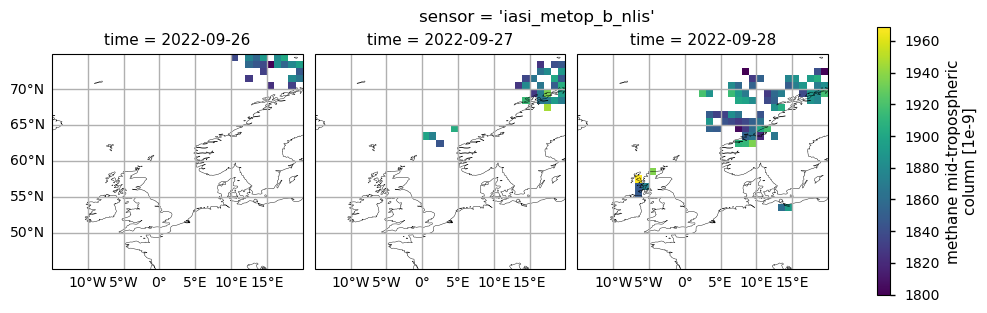

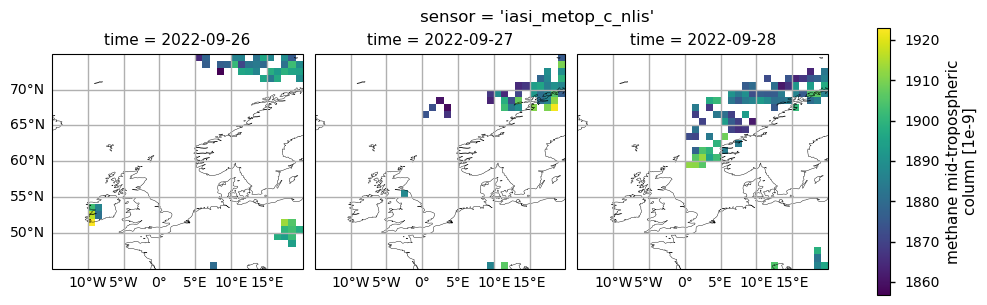

In [14]:
# To plot CH4 data for sensors and selected days
for sensor, ds_sensor in ds.groupby("sensor"):
        # Select days of interest
        ds_sensor_filtered = ds_sensor.sel(time=selected_days)
        plot.projected_map(ds_sensor_filtered["ch4"], col="time", col_wrap=3)
        plt.suptitle(f"{sensor = }", y=1)
        plt.show()

*Fig. 1.2.4.2 The figure shows mid-tropospheric CH4 (expressed in ppb) for 26-28 September 2022 as provided by the IASI-B (upper plots) and IASI-C (lower plots) datasets (v10.2).*

#### Spatial and temporal analysis of cloud cover
To attribute differences in the data availability between mid-tropospheric CH4 data from Climate Data Store and that reported by [[3]](https://doi.org/10.5194/acp-24-10639-2024), we inspected the daily values of cloud cover fraction provided by the CDS Interim Climate Data Record [[6]](https://cds.climate.copernicus.eu/datasets/satellite-cloud-properties?tab=overview) "Cloud properties global gridded monthly and daily data from 1979 to present derived from satellite observations" (product family: CLARA-A3). 
It is clear that the the presence of high values of cloud cover fraction over the most part of the observation scene prevented the detection of the Nord Stream plume on 26 -  27 September 202 by the CDS IASI mid-tropospheric CH4 dataset. According to the Documentation [[7]](https://wdc.dlr.de/C3S_312b_Lot2/Documentation/GHG/C3S2_312a_Lot2_ATBD_GHG_E_latest.pdf), the CDS mid-tropospheric satellite IASI CH4 (v10.2) dataset is retrieved when no cloud or aerosol is detected. On the other hand, for the dataset used by [[3]](https://doi.org/10.5194/acp-24-10639-2024), only scenes strongly affected by clouds are not processed [[8]](https://doi.org/10.5281/zenodo.5873645).

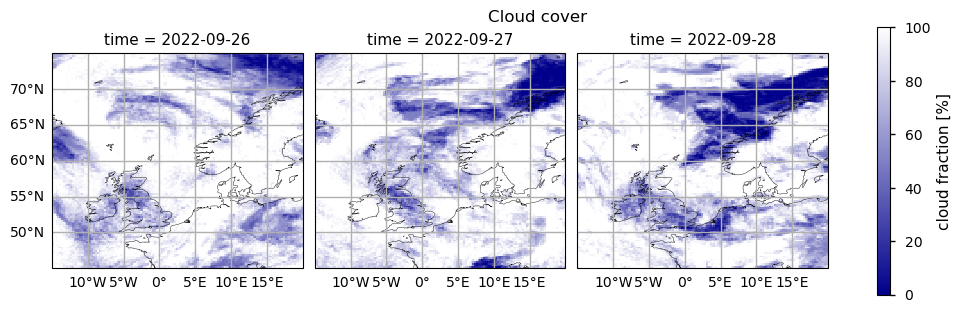

In [41]:
# Colormap
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ["darkblue", "white"])

# Filter data for selected days
ds_cloud_filtered = ds_cloud.sel(time=selected_days)

# Setting plot view
plot_kwargs = {"col": "time", "col_wrap": 3}

# Plotting cloud cover data
plot.projected_map(ds_cloud_filtered[varname_cloud], cmap=cmap, **plot_kwargs)
_ = plt.suptitle("Cloud cover", y=1)

plt.show()

*Fig. 1.2.4.3 The figure shows the total cloud coverage fraction (espressed as %) for 26-28 September 2022 as provided by the CDS Interim Climate Data Record “Cloud properties global gridded monthly and daily data from 1979 to present derived from satellite observations” (product family: CLARA-A3)*

#### Analysis of CH4 averaging kernel

The averaging kernel (AK) accounts for the vertical sensitivity of the derived CH4 values from the IASI retrievals described in [[7]](https://wdc.dlr.de/C3S_312b_Lot2/Documentation/GHG/C3S2_312a_Lot2_ATBD_GHG_E_latest.pdf). For this mid-tropospheric CH4 product, the normalised column AK values averaged over the spatial domain showed a maximum sensitivity in the mid-upper troposphere (from 80 to 600 hPa) during the considered time period. According to [[3]](https://doi.org/10.5194/acp-24-10639-2024), the northern part of the Nord Stream plume, extending from the Scandinavian west coast, was diffuse above 500 hPa, favouring detection by the mid-tropospheric CH4 IASI data products. The user interested in further information on the correct use of the AKs is recommended to consult the dataset Documentation [[9]](https://wdc.dlr.de/C3S_312b_Lot2/Documentation/GHG/C3S2_312a_Lot2_PUGS_GHG_E_latest.pdf).   

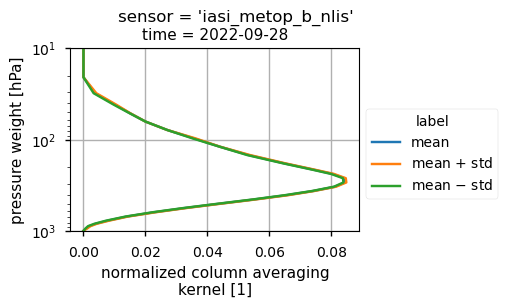

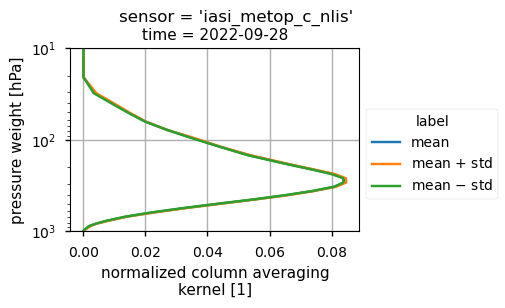

In [42]:
# Setting plot view
plot_kwargs = {"col": "time", "col_wrap": 1}

for sensor, da_sensor in ds[vertical_profile].groupby("sensor"):
    da_mean = diagnostics.spatial_weighted_mean(da_sensor)
    da_std = diagnostics.spatial_weighted_std(da_sensor)
    da = xr.concat(
        [
            da_mean.expand_dims(label=["mean"]),
            (da_mean + da_std).expand_dims(label=["mean $+$ std"]),
            (da_mean - da_std).expand_dims(label=["mean $-$ std"]),
        ],
        "label",
    )
    da_filtered = da.sel(time=selected_days_AK)
    facet = da_filtered.plot(
        y="pressure_weight",
        hue="label",
        yscale="log",
        yincrease=False,
        ylim=(1000, 10),  # Limit y axis to 1
        **plot_kwargs,
    )
    for ax in facet.axs.flatten():
        ax.grid()
    plt.suptitle(f"{sensor = }", y=1.01)
    plt.show()

*Fig. 1.2.4.4 IASI-B (top plot) and IASI-C (bottom plot) for CH4 normalised column averaging kernel computed over the analysed region on 28 September 2022.*

#### Temporal variability of mid-tropospheric CH4 over the region

To illustrate the temporal variability of the mid-tropospheric CH4 column over the study region, we calculated the distribution of CH4 values for each single day during September 2022 for both IASI-B and IASI-C. The box and wiskers plot shows the percentiles of the data distribution, the median (green line) as well as the outliers. 
It can be seen that despite the occurrence of the Nord Stream leak and the effective detection of the plume signal by IASI-C on 29 September 2022, the CH4 values did not deviate from the monthly variability.
This further demonstrates that, as clearly stated in the dataset Documentation [[5]](https://wdc.dlr.de/C3S_312b_Lot2/Documentation/GHG/C3S2_312a_Lot2_PUGS_GHG_main_latest.pdf), this dataset should be used them in combination with appropriate modelling to obtain information on surface sources and sinks. See, as an example, [[10]](https://climate.copernicus.eu/esotc/2023/greenhouse-gas-fluxes) .

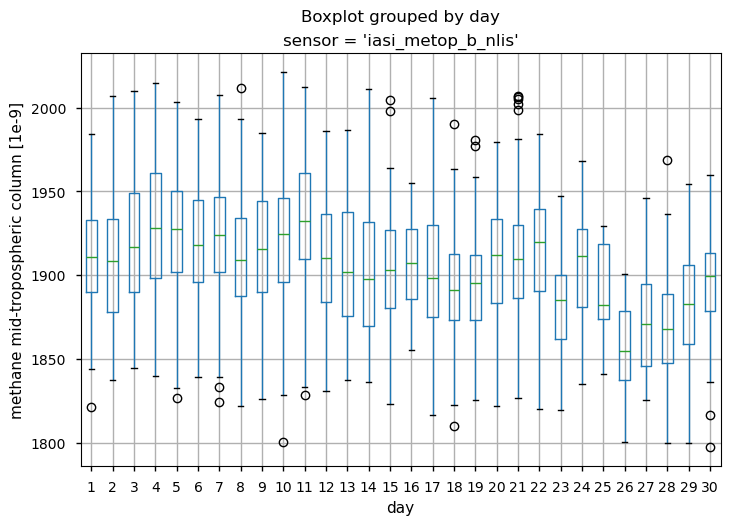

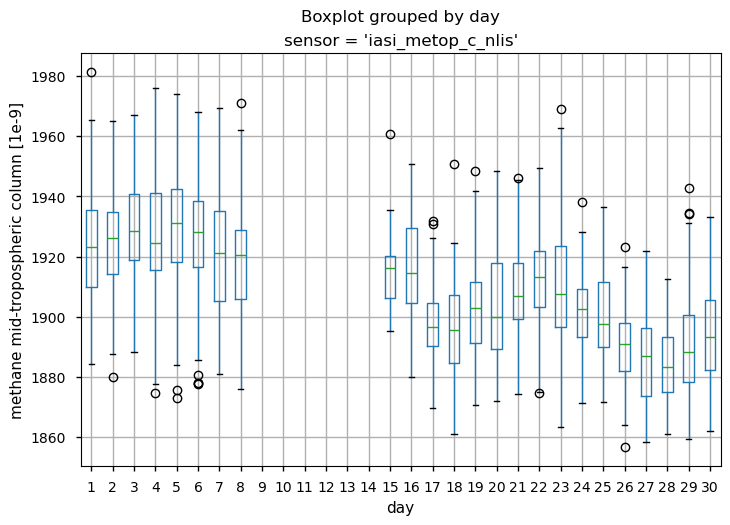

In [43]:
for sensor, ds_sensor in ds.groupby("sensor"):
    da_sensor = ds_sensor["ch4"].squeeze()
    df_sensor = (
        da_sensor.stack(location=("latitude", "longitude"))
        .drop_vars("location")
        .to_dataframe()
    )
    df_sensor = df_sensor.reset_index()[["time", "ch4"]]
    df_sensor["day"] = df_sensor["time"].dt.day
    ax = df_sensor[["day", "ch4"]].boxplot(by="day")
    ax.set_title(f"{sensor = }")
    ax.set_xlabel("day")
    ax.set_ylabel(f"{da_sensor.long_name} [{da_sensor.units}]")
    plt.show()

*Fig. 1.2.4.5 Daily percentiles and outliers for mid-tropospheric CH4 (expressed in ppb) during September 2022 as provided by the IASI-B (upper plots) and IASI-C (lower plots) datasets (v10.2).*

## ℹ️ If you want to know more

### Key resources

The CDS catalogue entries for the data used were:
* Methane data from 2002 to present derived from satellite observations: https://cds.climate.copernicus.eu/datasets/satellite-methane?tab=overview
* Cloud properties global gridded monthly and daily data from 1979 to present derived from satellite observations: https://cds.climate.copernicus.eu/datasets/satellite-cloud-properties?tab=overview

More information on the Nord Stream leak event can be found in [[4]](https://www.unep.org/news-and-stories/story/pipeline-blasts-released-record-shattering-amount-methane-unep-study).

Users interested in near-ral time detection of hot-spot locations for methane emissions can consider to use the CAMS Methane Hotspot Explorer [[11]](https://atmosphere.copernicus.eu/ghg-services/cams-methane-hotspot-explorer?utm_source=press&utm_medium=referral&utm_campaign=CH4-app-2025).

Code libraries used:
* [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`,  prepared by [B-Open](https://www.bopen.eu/)

https://www.unep.org/news-and-stories/story/pipeline-blasts-released-record-shattering-amount-methane-unep-study

### References
[[1]](https://wmo.int/publication-series/wmo-greenhouse-gas-bulletin-no-19) World Meteorological Organization (2023). WMO Greenhouse Gas Bulletin, No. 19, ISSN 2078-0796.

[[2]](https://doi.org/10.1073/pnas.0600201103) West, J. J., Fiore, A. M., Horowitz, L. W., and Mauzerall, D. L. (2006). Global health benefits of mitigating ozone pollution with methane emission controls. P. Natl. Acad. Sci. USA, 103, 3988–3993. 

[[3]](https://doi.org/10.5194/acp-24-10639-2024) Wilson, C., Kerridge, B. J., Siddans, R., Moore, D. P., Ventress, L. J., Dowd, E., Feng, W., Chipperfield, M. P., and Remedios, J. J. (2024). Quantifying large methane emissions from the Nord Stream pipeline gas leak of September 2022 using IASI satellite observations and inverse modelling. Atmos. Chem. Phys., 24, 10639–10653.   

[[4]](https://www.unep.org/news-and-stories/story/pipeline-blasts-released-record-shattering-amount-methane-unep-study) United Nations Environmental Programme (UNEP), (2025). Pipeline blasts released record-shattering amount of methane: UNEP study. https://www.unep.org/news-and-stories/story/pipeline-blasts-released-record-shattering-amount-methane-unep-study.

[[5]](https://wdc.dlr.de/C3S_312b_Lot2/Documentation/GHG/C3S2_312a_Lot2_PUGS_GHG_main_latest.pdf) Buchwitz, M. (2024). Product User Guide and Specification (PUGS) – Main document for Greenhouse Gas (GHG: CO2 & CH4) data set CDR7 (01.2003-12.2022). 

[[6]](https://cds.climate.copernicus.eu/datasets/satellite-cloud-properties?tab=overview) Copernicus Climate Change Service (C3S), Climate Data Store (CDS). (2022). Cloud properties global gridded monthly and daily data from 1982 to present derived from satellite observations. Copernicus Climate Change Service (C3S) Climate Data Store (CDS). DOI: 10.24381/cds.68653055 (Accessed on 19-Mar-2025). 

[[7]](https://wdc.dlr.de/C3S_312b_Lot2/Documentation/GHG/C3S2_312a_Lot2_ATBD_GHG_E_latest.pdf) Crevoisier, C. (2024). Algorithm Theoretical Basis Document (ATBD) – ANNEX E for IASI CO2 (v10.1) and CH4 (v10.2) and AIRS CO2 mid-tropospheric products.

[[8]](https://doi.org/10.5281/zenodo.5873645). Ventress, L., Siddans, R., Knappett, D. (2021). RAL IASI Methane Retrieval (ATDB).  

[[9]](https://wdc.dlr.de/C3S_312b_Lot2/Documentation/GHG/C3S2_312a_Lot2_PUGS_GHG_E_latest.pdf) Crevoisier, C. (2023). Product User Guide and Specification (PUGS) – ANNEX E for IASI CO2 (10.1) and CH4 (v10.2) and AIRS CO2 mid-tropospheric products.

[[10]](https://climate.copernicus.eu/esotc/2023/greenhouse-gas-fluxes) Copernicus Climate Change Service (C3S). (2024). European State of the Climate 2023, Web site.

[[11]](https://atmosphere.copernicus.eu/ghg-services/cams-methane-hotspot-explorer?utm_source=press&utm_medium=referral&utm_campaign=CH4-app-2025) Copernicus Atmosphere Monitoring Service (CAMS). (2025). Copernicus: Tool to routinely identify and track methane emissions and leaks goes operational, Web site.